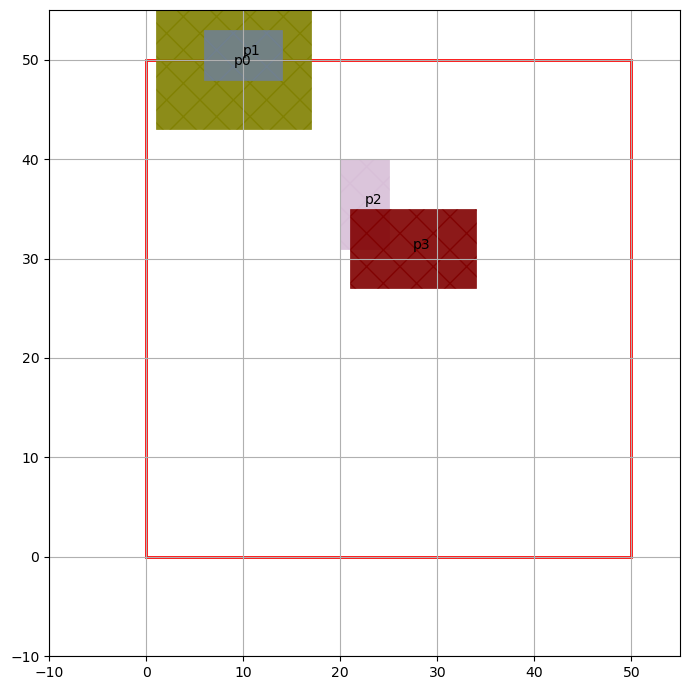

In [12]:
from util import *
from generation import *
from conditions import *

layout_zone         = Rectangle(0,0,50,50)    #{"xmin"   : 0, "ymin"   : 0, "width"  : 100, "height" : 100}
participants        = generate_unconnected_participants(4, layout_zone, 20, 20, 420)
ds_goal             = 15.0

plot_size           = 1.1 * layout_zone.width


a = plot_participants(layout_zone, participants, plot_size, plot_size, plot_connections= True)

In [13]:
participants

Participants(p0=Participant(idx='p0', connections=(), xmin=1, ymin=43, width=16, height=13, clashes=Clashes(p0=0, p1=0, p2=0, p3=0), aversions=Aversions(p0=0, p1=0, p2=0, p3=0), interference=0, overlap_with_idx=(), turmoil=0, relaxed_connections=0, protrusion_status='', protrusion_extend=0, protruded_zone_edges=(), healthy=True, compliant=True, yield_polygon=(), freespace=(), secondary_freespace_north_east=(), secondary_freespace_south_east=(), secondary_freespace_south_west=(), secondary_freespace_north_west=(), last_move='', color='olive'), p1=Participant(idx='p1', connections=(), xmin=6, ymin=48, width=8, height=5, clashes=Clashes(p0=0, p1=0, p2=0, p3=0), aversions=Aversions(p0=0, p1=0, p2=0, p3=0), interference=0, overlap_with_idx=(), turmoil=0, relaxed_connections=0, protrusion_status='', protrusion_extend=0, protruded_zone_edges=(), healthy=True, compliant=True, yield_polygon=(), freespace=(), secondary_freespace_north_east=(), secondary_freespace_south_east=(), secondary_freespa

In [14]:
calculate_overlap(participants.p3, participants.p1)

((), [False, False, False, False, False, False])

In [15]:
pstar               = participants.p2

In [16]:
# determine free edges


conditions          = [calculate_lateral_condition(pstar, p , 0.5, 0.5, 100) for p in participants if p.idx != pstar.idx]

masks_edges         = [cond.locations for cond in conditions]

free_edges_bool     = [all(mask[i] for mask in masks_edges) for i in range(4)]

free_edges_str      = [y for (x,y) in zip(free_edges_bool, ['west', 'east', 'north', 'south']) if x]

free_edges_str

['west', 'north']

In [17]:
calclulate_free_space(pstar, free_edges_str, participants, layout_zone)

Rectangle(xmin=0, ymin=31, width=25, height=19)

In [18]:
# determine free vertices

overlaps            = [cond.overlap for cond in conditions if cond.overlap]

#print(overlaps)

free_vertices_bool       = calculate_free_corners(pstar, overlaps, layout_zone)

#print(free_vertices_bool)
free_vertices_str   = [y for (x,y) in zip(free_vertices_bool, [('left', 'top'), ('right', 'top'), ('left', 'bottom'), ('right', 'bottom')]) if x]

free_vertices_str

[('left', 'top'), ('right', 'top'), ('left', 'bottom')]

In [19]:
calclulate_all_secondary_free_spaces(pstar, free_vertices_str, participants, layout_zone)

(Rectangle(xmin=0, ymin=0, width=50, height=50),
 Rectangle(xmin=0, ymin=35, width=50, height=15),
 (),
 Rectangle(xmin=0, ymin=0, width=21, height=50))

In [20]:
calculate_conditions(pstar, participants, layout_zone, 0.5, 0.5, 100)

Participant(idx='p2', connections=(), xmin=20, ymin=31, width=5, height=9, clashes=Clashes(p0=0, p1=0, p3=1), aversions=Aversions(p0=0.0, p1=0.0, p3=1664), interference=1664.0, overlap_with_idx=('p3',), turmoil=0.0, relaxed_connections=0, protrusion_status='safe', protrusion_extend=(0, 0), protruded_zone_edges=(), healthy=True, compliant=True, yield_polygon=(), freespace=Rectangle(xmin=0, ymin=31, width=25, height=19), secondary_freespace_north_east=Rectangle(xmin=0, ymin=35, width=50, height=15), secondary_freespace_south_east=(), secondary_freespace_south_west=Rectangle(xmin=0, ymin=0, width=21, height=50), secondary_freespace_north_west=Rectangle(xmin=0, ymin=0, width=50, height=50), last_move='', color='thistle')

In [21]:
from swarm import *

determine_initial_conditions(participants, layout_zone, 0.5, 100)

Participants(p0=Participant(idx='p0', connections=(), xmin=1, ymin=43, width=16, height=13, clashes=Clashes(p1=1, p2=0, p3=0), aversions=Aversions(p1=1600, p2=0.0, p3=0.0), interference=1600.0, overlap_with_idx=('p1',), turmoil=0.0, relaxed_connections=0, protrusion_status='prone', protrusion_extend=(0, -6), protruded_zone_edges=('north',), healthy=True, compliant=True, yield_polygon=(), freespace=Rectangle(xmin=0, ymin=0, width=50, height=50), secondary_freespace_north_east=(), secondary_freespace_south_east=(), secondary_freespace_south_west=Rectangle(xmin=0, ymin=0, width=50, height=50), secondary_freespace_north_west=(), last_move='', color='olive'), p1=Participant(idx='p1', connections=(), xmin=6, ymin=48, width=8, height=5, clashes=Clashes(p0=1, p2=0, p3=0), aversions=Aversions(p0=8320, p2=0.0, p3=0.0), interference=8320.0, overlap_with_idx=('p0',), turmoil=0.0, relaxed_connections=0, protrusion_status='prone', protrusion_extend=(0, -3), protruded_zone_edges=('north',), healthy=T

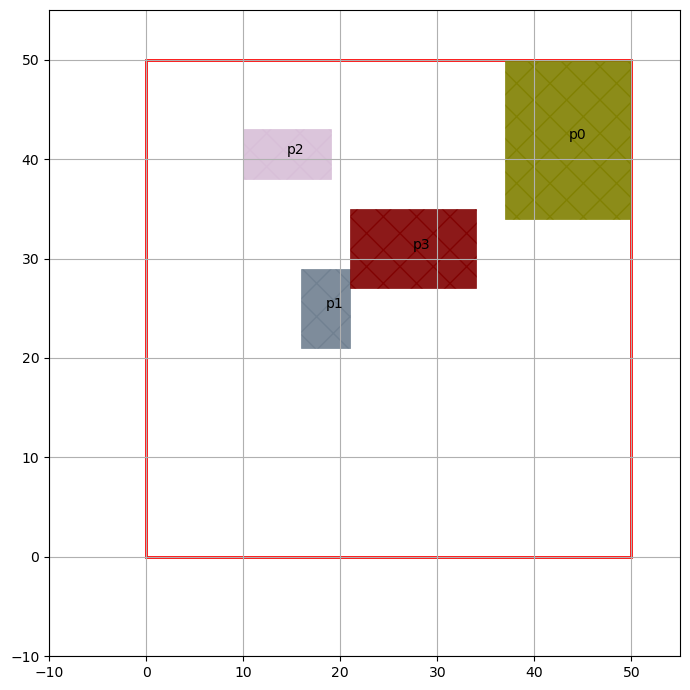

In [22]:
participants, runtime = one_round_of_interaction(participants, layout_zone, 'interference', 0.5, 100)

a = plot_participants(layout_zone, participants, plot_size, plot_size, plot_connections= True)